<h1><center>Mask Detection Project</center></h1> 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## <center>Team Members</center> 
### <center> 1) Linzi Sun <br> 2) Haad Khurram Danyal </center> 


# Problem Statement

One of a prominent Food industry plant in Canada require their employees to wear masks while contacting with food so curb the spread any kind of contamination. Hence, it is a very tedius task to keep in check the employees all the time. Secondly, a covid outbreak is detrimental to the operation of the company as everyone works in a close net circle. Therefore, it is required to develop an automated mask detection system to ensure that everyone wears the masks. 

Mask detection models typically use computer vision techniques to identify faces in images or video frames, and then analyze those faces to determine whether or not a mask is present. Deep learning models, in particular, have been shown to be very effective at this task. These models typically use convolutional neural networks (CNNs) to analyze the images, and may also use other techniques such as data augmentation, transfer learning, and fine-tuning to improve their accuracy.

In [14]:
def detect_mask(img,model):
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    #face_model = cv2.CascadeClassifier(r"D:\ana\envs\tensorflow_test\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml")
    faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=3)
    if len(faces)>=1:
        new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        for i in range(len(faces)):
            (x,y,w,h) = faces[i]
            crop = new_img[y:y+h,x:x+w]
            crop = cv2.resize(crop,(128,128))
            crop = np.reshape(crop,[1,128,128,3])/255.0
            mask_result = model.predict(crop)
            cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color_label[mask_result.argmax()],2)
            cv2.rectangle(new_img,(x,y),(x+w,y+h),color_label[mask_result.argmax()],1)
        plt.figure(figsize=(10,10))
        plt.imshow(new_img)

    else:
        print("No. of faces detected is less than 1")

In [24]:
train_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_dir = '/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

In [25]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2, rotation_range=40)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


# Pre Trained Models

In [16]:
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import load_img

In [17]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in mobilenet.layers:
    layer.trainable = False
    
model_mobilenet = Sequential()
model_mobilenet.add(mobilenet)
model_mobilenet.add(Flatten())
model_mobilenet.add(Dense(2, activation='sigmoid'))
model_mobilenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functio  (None, 4, 4, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 2)                 32770     
                                                                 
Total params: 3,261,634
Trainable params: 32,770
Non-trainable params: 3,228,864
_________________________________________________________________


In [20]:
from tensorflow.keras.applications import Xception

model = Xception(weights='imagenet')
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

xception = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in xception.layers:
    layer.trainable = False
    
model_xception = Sequential()
model_xception.add(xception)
model_xception.add(Flatten())
model_xception.add(Dense(2, activation='sigmoid'))
model_xception.summary()


83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 21,062,186
Trainable params: 200,706
Non-trainable params: 20,861,480
_________________________________________________________________


In [22]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model_vgg = Sequential()
model_vgg.add(vgg19)
model_vgg.add(Flatten())
model_vgg.add(Dense(2,activation='sigmoid'))
model_vgg.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 16386     
                                                                 
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


In [19]:
from tensorflow.keras.applications import ResNet50

model = ResNet50(weights='imagenet')

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in resnet.layers:
    layer.trainable = False
    
model_resnet = Sequential()
model_resnet.add(resnet)
model_resnet.add(Flatten())
model_resnet.add(Dense(2, activation='sigmoid'))
model_resnet.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 65538     
                                                                 
Total params: 23,653,250
Trainable params: 65,538
Non-trainable params: 23,587,712
_________________________________________________________________


Training MobileNet model...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Training vgg19 model...
Training ResNet50 model...
Training Xception model...


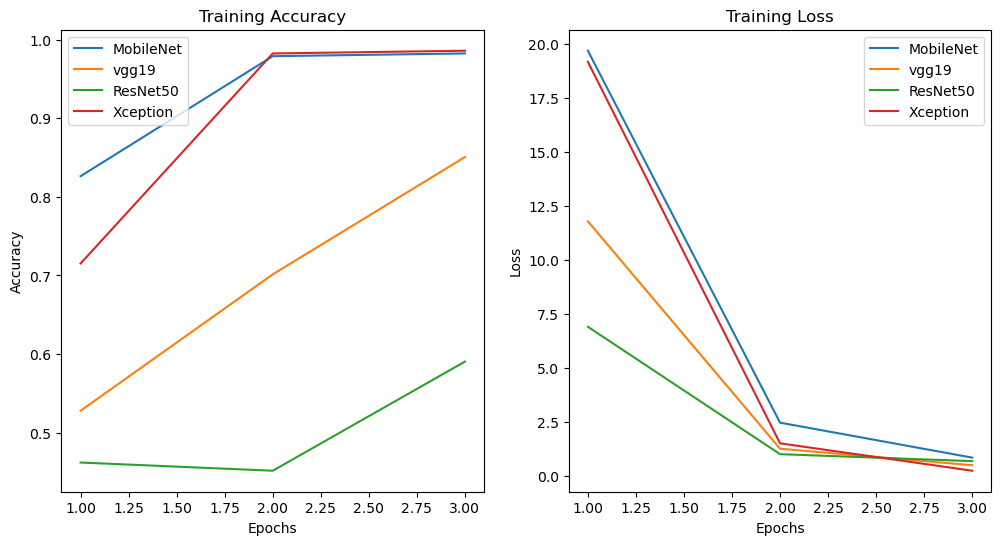

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet, ResNet50, Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

models = {
    'MobileNet': MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    'vgg19': VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3)),
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    'Xception': Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
}

# Define the classification layers
classification_layer = Dense(2, activation='sigmoid')

# Train the models and store the history
histories = {}
for name, model in models.items():
    print(f'Training {name} model...')
    
    # Freeze the pre-trained layers
    for layer in model.layers:
        layer.trainable = False
    
    # Create a new model with the pre-trained layers and classification layer
    model = Sequential([
        model,
        Flatten(),
        Dense(16384, activation='relu'),
        classification_layer
    ])
    
    # Compile the model
    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit_generator(generator=train_generator,
                                  steps_per_epoch=len(train_generator) // 32,
                                  epochs=3,
                                  validation_data=val_generator,
                                  validation_steps=len(val_generator) // 32,
                                  verbose=0)
    
    # Store the history
    histories[name] = history

# Plot the accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
for name, history in histories.items():
    plt.plot(np.arange(1, 4), history.history['accuracy'], label=name)
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for name, history in histories.items():
    plt.plot(np.arange(1, 4), history.history['loss'], label=name)
plt.legend()

plt.show()


# Conclusion

After we plot the accuracy of different deep learning architectures used for computer vision tasks of image classification, we have found that mobilenet has the best performance. It has a small memory footprint and can achieve high accuracy.

Xception is an extension of the Inception architecture that uses depthwise separable convolutions and also achieve high accuracy